In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
#plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
from matplotlib.patches import Rectangle

In [2]:
THTs = xr.open_mfdataset("../data_for_plots/sensitivity_detection.nc")
SIarea = xr.open_mfdataset("../data_for_plots/SIarea_0201-01-01_0300-12-30_JJA_zonal_mean.nc")

In [3]:
SIedge15 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.15) + 10).values
SIedge80 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.80) + 10).values

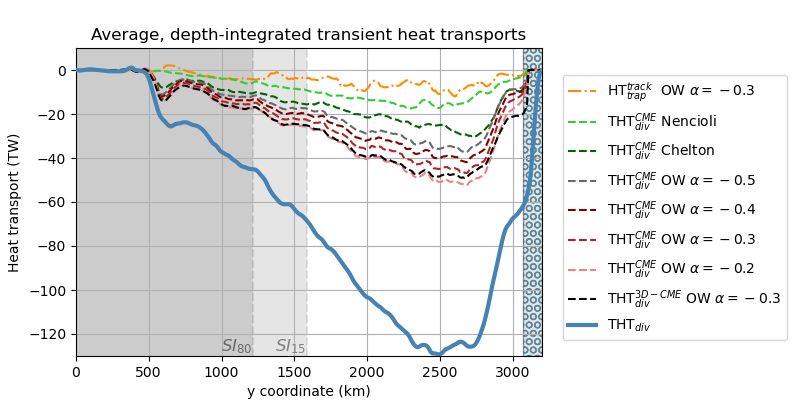

In [4]:
fig, ax = plt.subplots(1, figsize=(8, 4))

THTs.THTobs.plot(label=r"HT$_{trap}^{track}$  OW $\alpha=-0.3$", color="darkorange", ls="-.")

THTs.THTdiveddyUV.plot(label=r"THT$_{div}^{CME}$ Nencioli", color="limegreen", ls="--")

THTs.THTdiveddySSH.plot(label=r"THT$_{div}^{CME}$ Chelton", color="darkgreen", ls="--")

THTs.THTdiveddyOW05.plot(label=r"THT$_{div}^{CME}$ OW $\alpha=-0.5$", color="dimgray", ls="--")
THTs.THTdiveddyOW04.plot(label=r"THT$_{div}^{CME}$ OW $\alpha=-0.4$", color="maroon", ls="--")
THTs.THTdiveddyOW03.plot(label=r"THT$_{div}^{CME}$ OW $\alpha=-0.3$", color="firebrick", ls="--")
THTs.THTdiveddyOW02.plot(label=r"THT$_{div}^{CME}$ OW $\alpha=-0.2$", color="lightcoral", ls="--")

THTs.THTdiveddy3D.plot(label=r"THT$_{div}^{3D-CME}$ OW $\alpha=-0.3$", color="black", ls="--")

THTs.THTdiv.plot(label="THT$_{div}$", color="steelblue", lw=3, zorder=11)

plt.legend(loc=3, fontsize=10, bbox_to_anchor=(1.03, 0.03))
plt.grid()
plt.title("Average, depth-integrated transient heat transports")
plt.ylabel("Heat transport (TW)")
plt.xticks(np.arange(0, 3.2e6, 0.5e6), np.arange(0, 3200, 500))
plt.yticks(np.arange(-120, 10, 20))
plt.xlabel("y coordinate (km)")
plt.xlim(0, 3.2e6)
plt.ylim(-130, 10)

ax.vlines(SIedge15, -130, 10,  colors='gray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -130), SIedge15, 140, alpha=0.2, facecolor="gray", edgecolor=None))
ax.text(SIedge15, -128, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax.vlines(SIedge80, -130, 10,  colors='dimgray', linestyle='--', alpha=0.2)
ax.add_patch(Rectangle((0, -130), SIedge80, 140, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax.text(SIedge80, -128, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")

ax.add_patch(Rectangle((3.07e6, -130), 0.13e6, 140, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

plt.subplots_adjust(right=0.677, left=0.095)

plt.savefig("figS04-sensitivity_detection.png", dpi=300)